In [19]:
import gym
import numpy as np
import time

env=gym.make('FrozenLake-v1')
STATES=env.observation_space.n
ACTION=env.action_space.n

Q=np.zeros((STATES,ACTION))
EPISODES=1500
MAX_STEPS=100
LEARNING_RATE=0.81
GAMMA=0.96
RENDER=False
epsilon=0.9



/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [20]:
rewards=[]
for episode in range(EPISODES):
  state=env.reset()
  for _ in range(MAX_STEPS):
    if RENDER:
      env.render()
    if np.random.uniform(0,1) < epsilon:
      action=env.action_space.sample()
    else:
      action=np.argmax(Q[state,:])
    next_state,reward,done,_=env.step(action)
    Q[state,action]=Q[state,action] + LEARNING_RATE *(reward + GAMMA * np.max(Q[next_state,:])-Q[state,action])
    state=next_state
    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break

print(Q)
print(f"Average Reward: {sum(rewards)/len(rewards)}")



/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[[6.15691459e-02 1.60378728e-02 1.63225254e-02 1.59643478e-02]
 [4.64210534e-03 4.56943145e-03 1.31803634e-02 1.25265979e-01]
 [1.29925591e-01 1.07611492e-02 8.99770291e-03 1.48857213e-02]
 [4.10886643e-03 1.32075006e-02 1.70967317e-02 1.78923963e-02]
 [1.51319011e-01 1.50245526e-02 1.23185989e-02 9.46953449e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.64955882e-04 1.06719906e-04 3.51492680e-02 1.43525848e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.67193101e-03 1.11038803e-02 1.31089051e-02 9.28338440e-02]
 [3.30529784e-03 5.55781779e-01 3.79931718e-03 8.35797934e-03]
 [1.59905665e-03 1.03555727e-03 2.42720073e-03 1.43538932e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.29579399e-02 2.70857929e-02 8.82581682e-01 3.01582910e-02]
 [1.03079891e-01 9.87386390e-01 9.52810335e-02 9.39263328e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


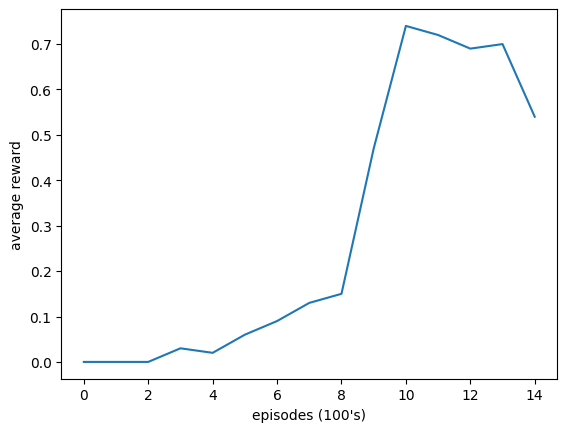

In [21]:
import matplotlib.pyplot as plt
def get_average(values):
  return sum(values)/len(values)
avg_rewards=[]
for i in range(0,len(rewards),100):
  avg_rewards.append(get_average(rewards[i:i+100]))
plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()